In [ ]:
# N=1000; a=0.4; b=50*(1-a); e=5;
# y=randn(N,1)*15 + 50; % true ages
# x=y*a+b; % simulate noiseless but biased predictions x
# x=x+randn(N,1)*e; % add errors into the age prediction x, like would naturally happen in practice
# grot = ( pinv([y ones(size(y))])*x );  % estimate the debiasing parameters
# a_est=grot(1)  % you can see these are v close to what they should be
# b_est=grot(2)
# x_debiased = (x-b_est)/a_est;  % debias on basis of predicted-age
# figure; subplot(1,2,1); dscatter(y,x); hold on; plot([0 90],[0 90],‘k’);
# subplot(1,2,2); dscatter(y,x_debiased); hold on; plot([0 90],[0 90],‘k’);
# mean(abs([ x-y x_debiased-y ]))

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
N=1000; a=0.4; b=50*(1-a); e=5;

8.324750456823244
10.056152405918008


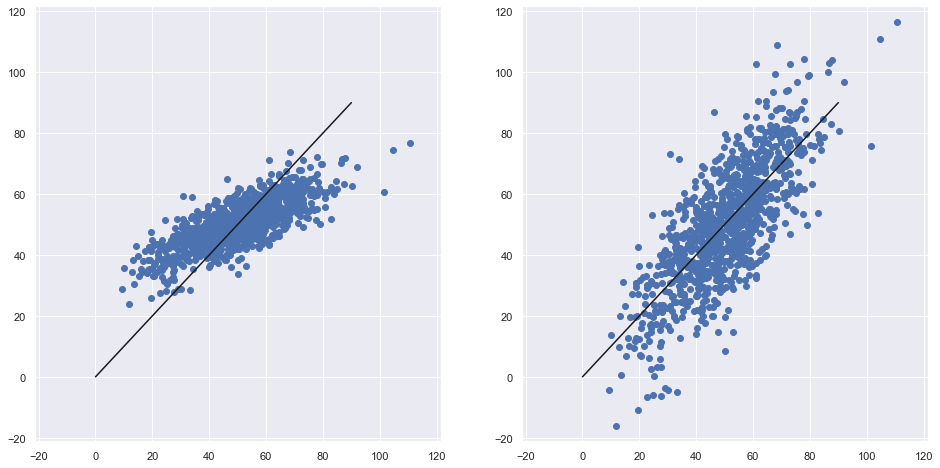

In [79]:
y=np.random.randn(N,1)*15 + 50; # true ages
x=y*a+b; #% simulate noiseless but biased predictions x
x=x+np.random.randn(N,1)*e; # add errors into the age prediction x, like would naturally happen in practice

grot = np.dot(np.linalg.pinv([y.flatten(), np.ones(len(y))]).T,x);  # estimate the debiasing parameters
a_est=grot[0]  # you can see these are v close to what they should be
b_est=grot[1]
x_debiased = (x-b_est)/a_est;  # debias on basis of predicted-age


x_min, x_max = np.min(x), np.max(x)
x2_min, x2_max = np.min(x_debiased), np.max(x_debiased)
y_min, y_max = np.min(y), np.max(y)
c_min, c_max = min(x_min, y_min, x2_min), max(x_max, y_max, x2_max)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(y,x)
plt.plot([0,90],[0,90],'k')
plt.xlim([c_min-5, c_max+5])
plt.ylim([c_min-5, c_max+5])

plt.subplot(1,2,2)
plt.scatter(y, x_debiased)
plt.plot([0,90],[0,90],'k')
plt.xlim([c_min-5, c_max+5])
plt.ylim([c_min-5, c_max+5])

print(np.mean(np.abs(x-y)))
print(np.mean(np.abs(x_debiased-y)))

In [75]:
def func(N=1000, a=0.4, b=None, e=5):

    if b == None:
        b = 50*(1-a)
    
    y=np.random.randn(N,1)*15 + 50; # true ages
    x=y*a+b; #% simulate noiseless but biased predictions x
    x=x+np.random.randn(N,1)*e; # add errors into the age prediction x, like would naturally happen in practice

    grot = np.dot(np.linalg.pinv([y.flatten(), np.ones(len(y))]).T,x);  # estimate the debiasing parameters
    a_est=grot[0]  # you can see these are v close to what they should be
    b_est=grot[1]
    x_debiased = (x-b_est)/a_est;  # debias on basis of predicted-age


    x_min, x_max = np.min(x), np.max(x)
    x2_min, x2_max = np.min(x_debiased), np.max(x_debiased)
    y_min, y_max = np.min(y), np.max(y)
    c_min, c_max = min(x_min, y_min, x2_min), max(x_max, y_max, x2_max)

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.scatter(y,x)
    plt.plot([0,90],[0,90],'k')
    plt.xlim([c_min-5, c_max+5])
    plt.ylim([c_min-5, c_max+5])

    plt.subplot(1,2,2)
    plt.scatter(y, x_debiased)
    plt.plot([0,90],[0,90],'k')
    plt.xlim([c_min-5, c_max+5])
    plt.ylim([c_min-5, c_max+5])
    
    plt.show()

    print(np.mean(np.abs(x-y)))
    print(np.mean(np.abs(x_debiased-y)))

======= a = 0.1 =======


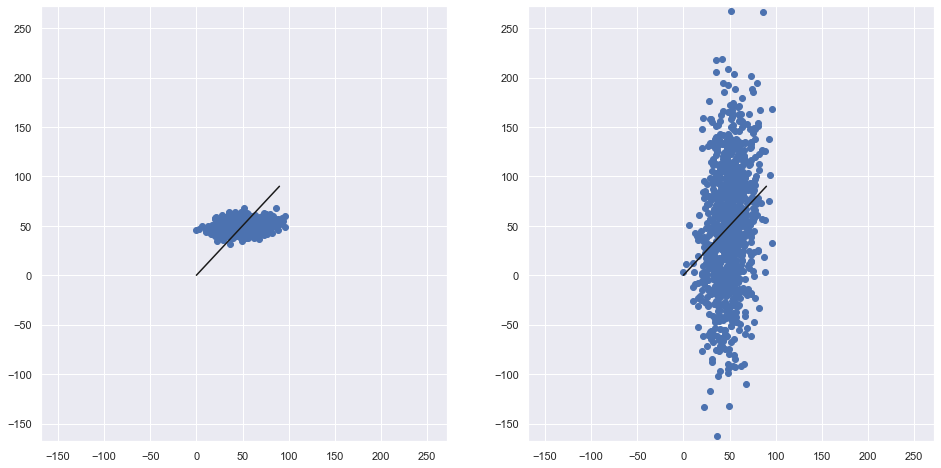

11.678931102294348
47.78508777044485
======= a = 0.25 =======


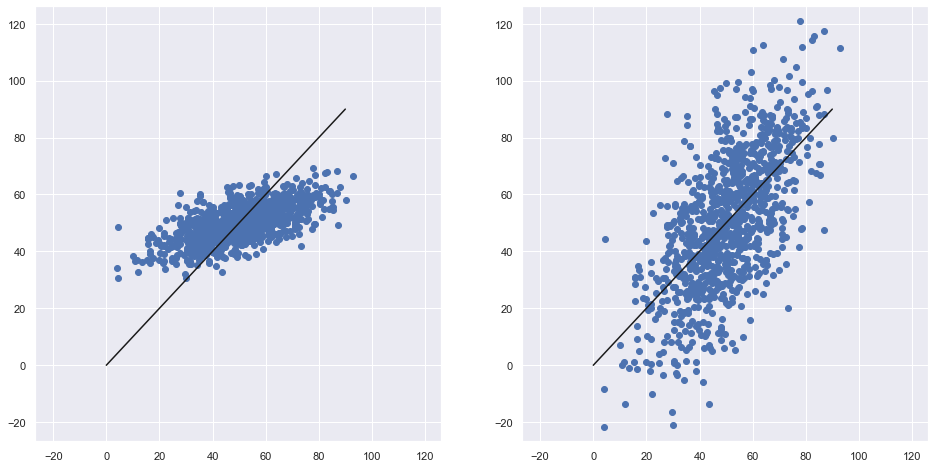

9.613579006221325
14.627323407437654
======= a = 0.5 =======


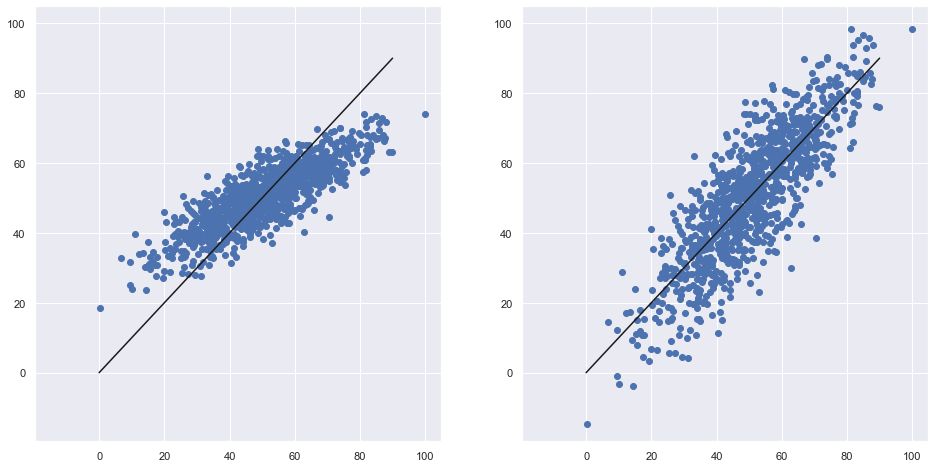

7.336859480354413
7.893013920278397
======= a = 0.75 =======


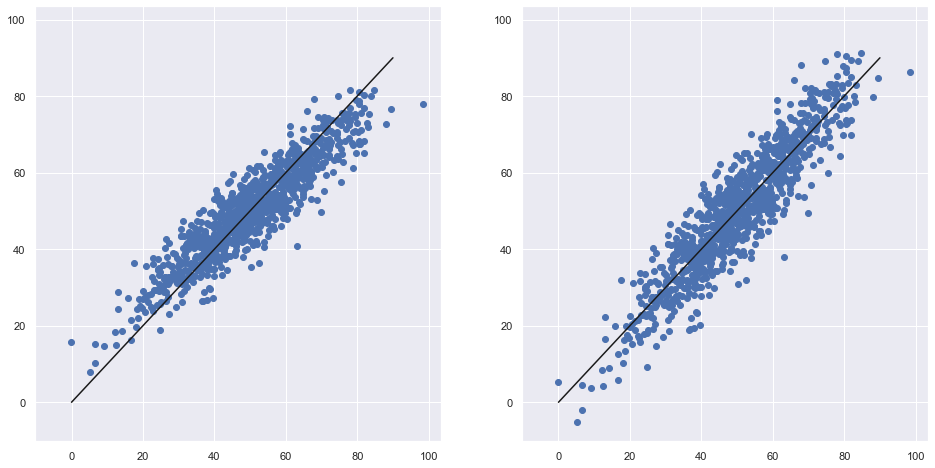

4.840805281619204
5.238110008839326
======= a = 0.99 =======


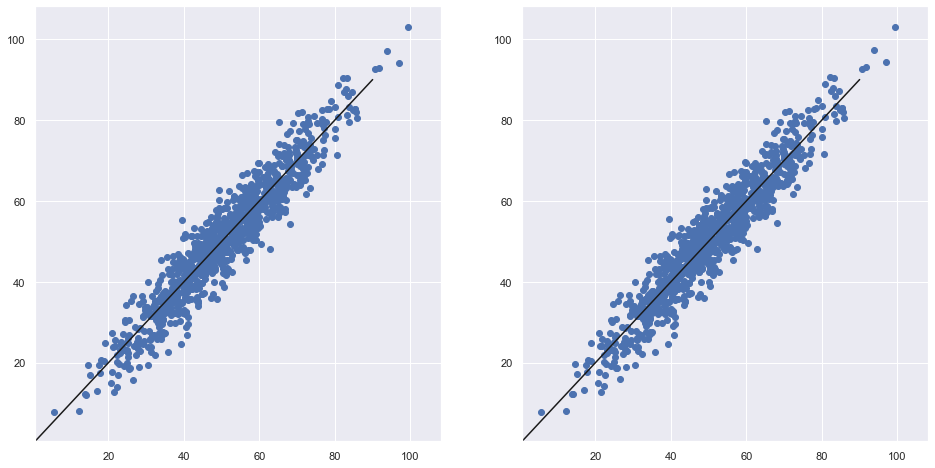

3.802787190477853
3.8034580018101103
======= a = 1.5 =======


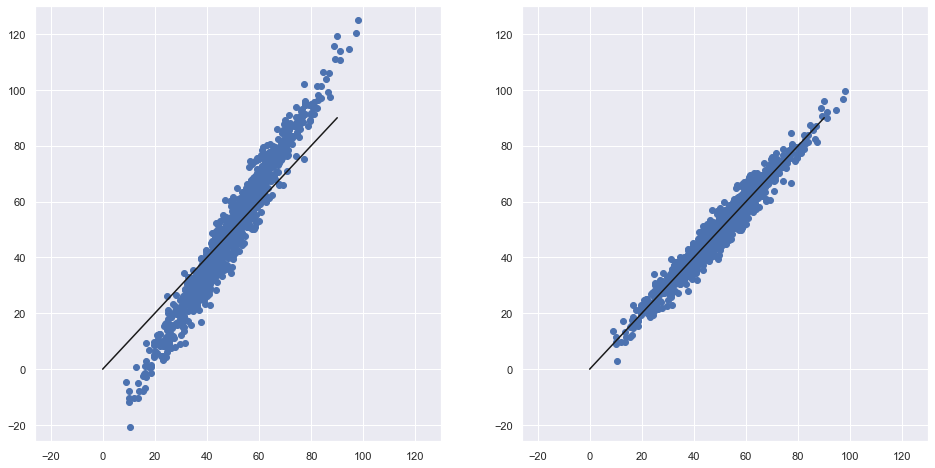

7.301862455191052
2.6382911348640365


In [83]:
A = [0.1, 0.25, 0.5, 0.75, 0.99, 1.5]
for a in A:
    print("======= a = {} =======".format(a))
    func(a=a)

======= b = 0.1 =======


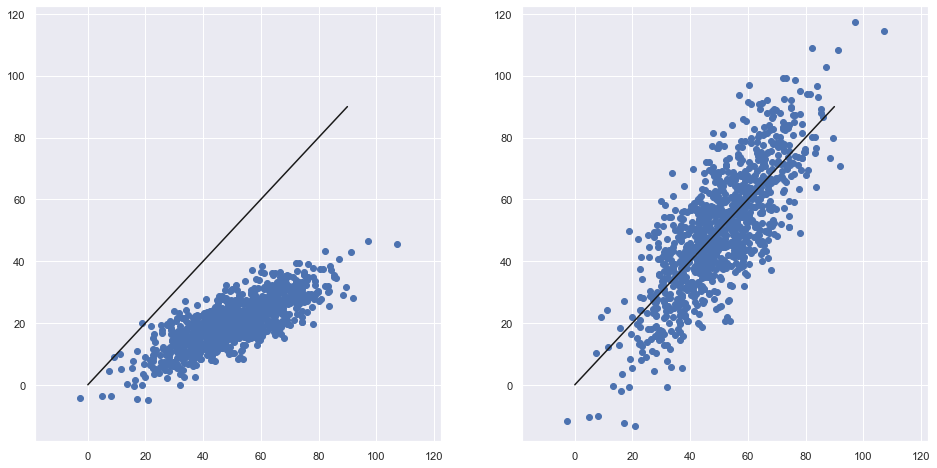

30.04887315274192
9.862773916876876
======= b = 10 =======


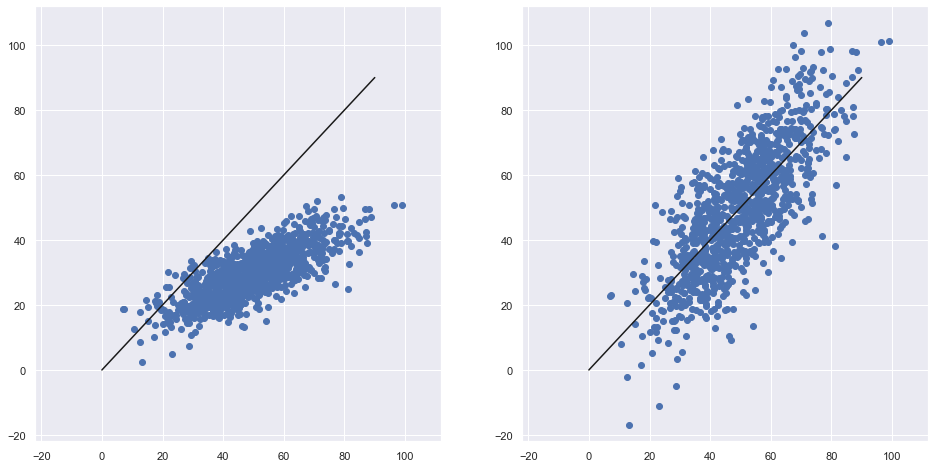

20.153046461662363
10.07297279175905
======= b = 25 =======


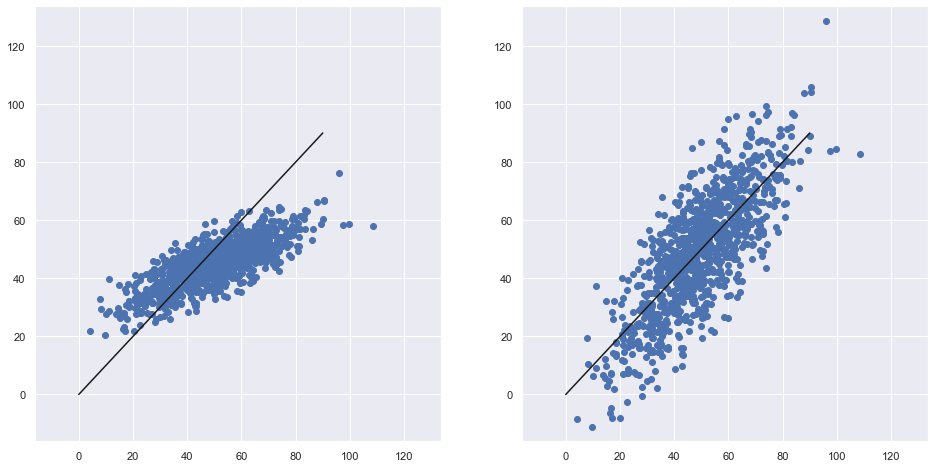

9.134652289022881
10.156833454493517
======= b = 50 =======


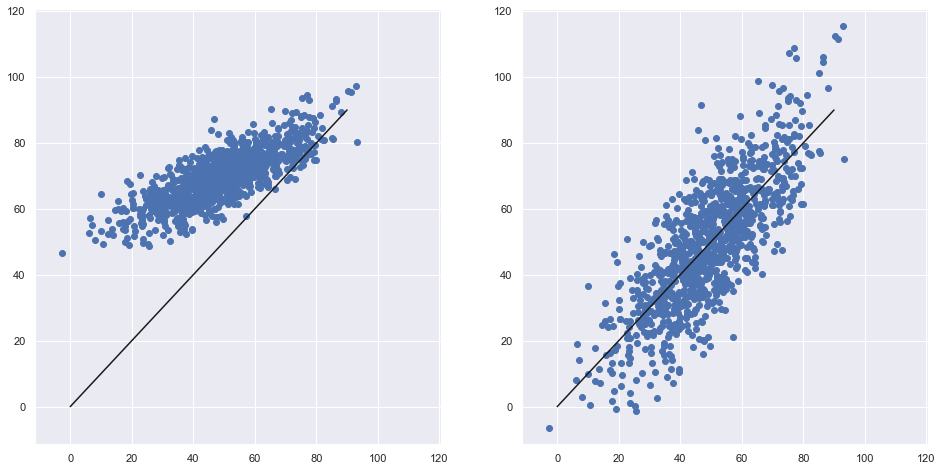

20.51964755341379
9.398468827981644
======= b = 75 =======


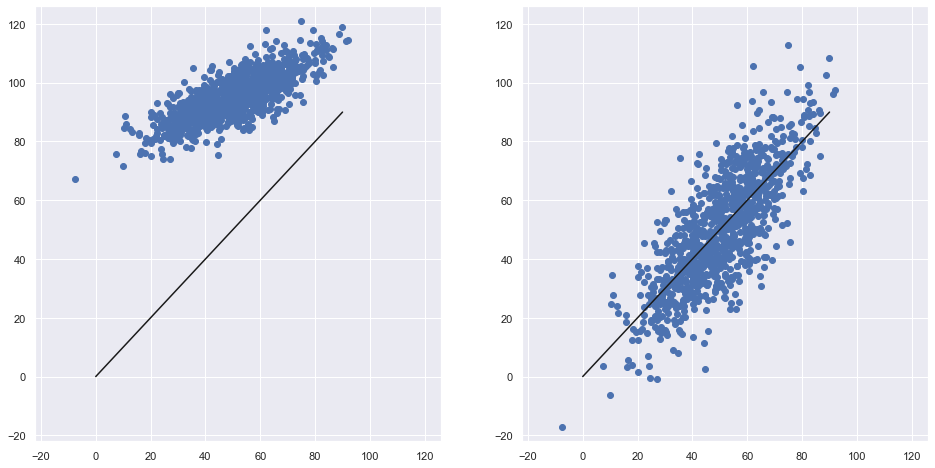

44.948420715097086
9.421887473462972
======= b = 100 =======


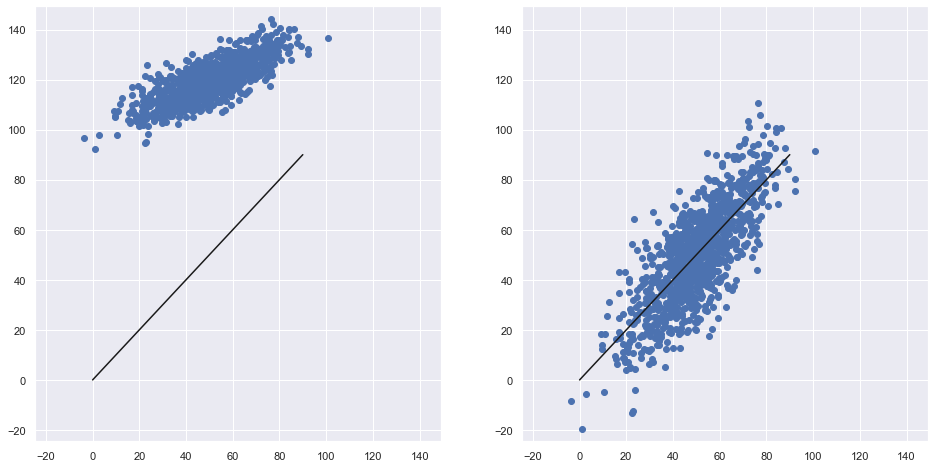

70.06098605435649
10.38934776497058
======= b = 1000 =======


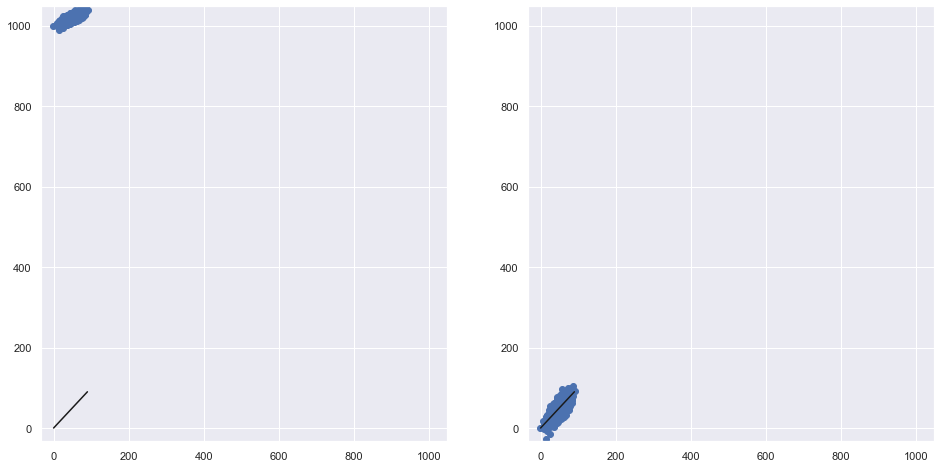

969.9766195656733
9.77433634972999


In [80]:
B = [0.1, 10, 25, 50, 75, 100, 1000]
for b in B:
    print("======= b = {} =======".format(b))
    func(b=b)

======= b = 0.06 =======


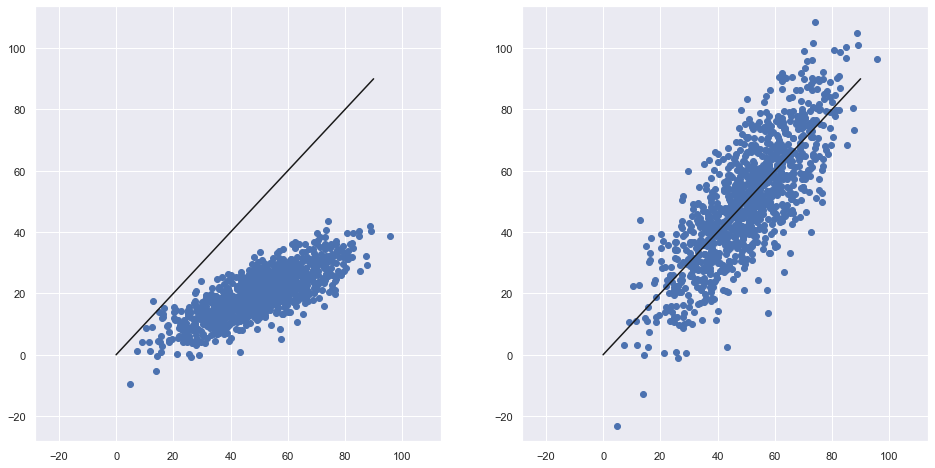

30.180907403633427
9.554877864350889
======= b = 6.0 =======


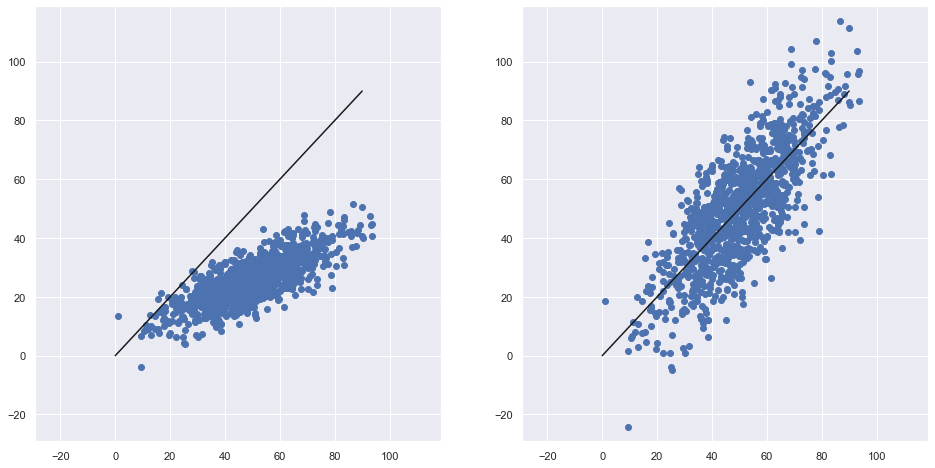

24.100540918917154
10.033336113353926
======= b = 15.0 =======


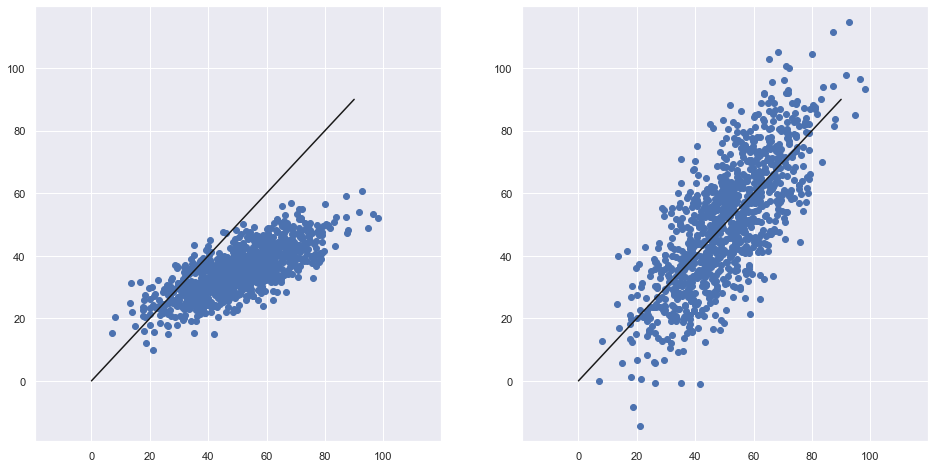

15.87854066452308
10.47848462342549
======= b = 30.0 =======


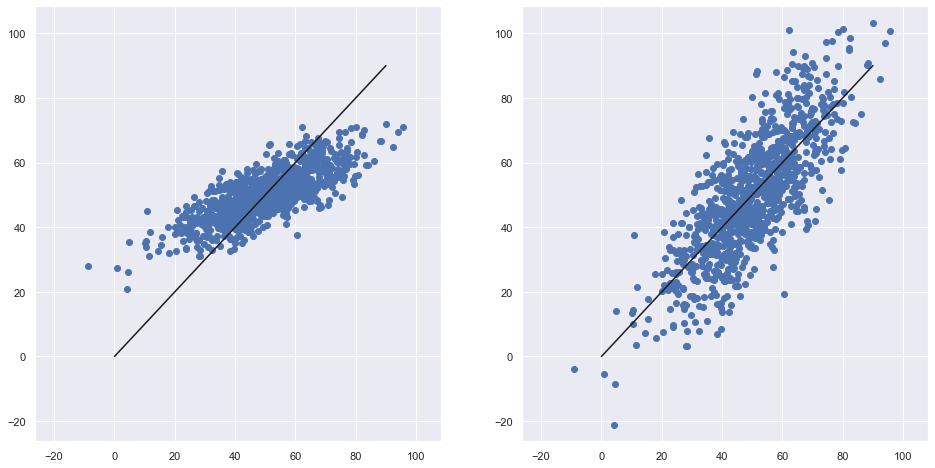

7.79959824656248
9.198915141761624
======= b = 45.0 =======


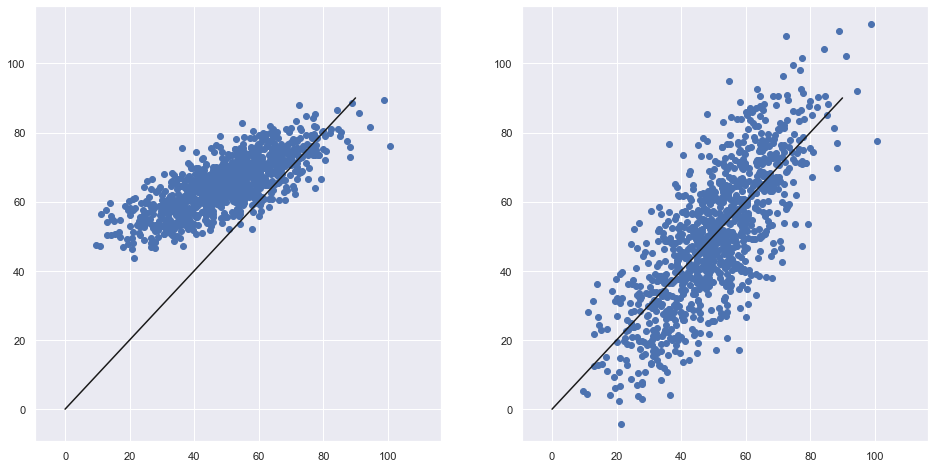

15.720539185328642
10.219805641432222
======= b = 60.0 =======


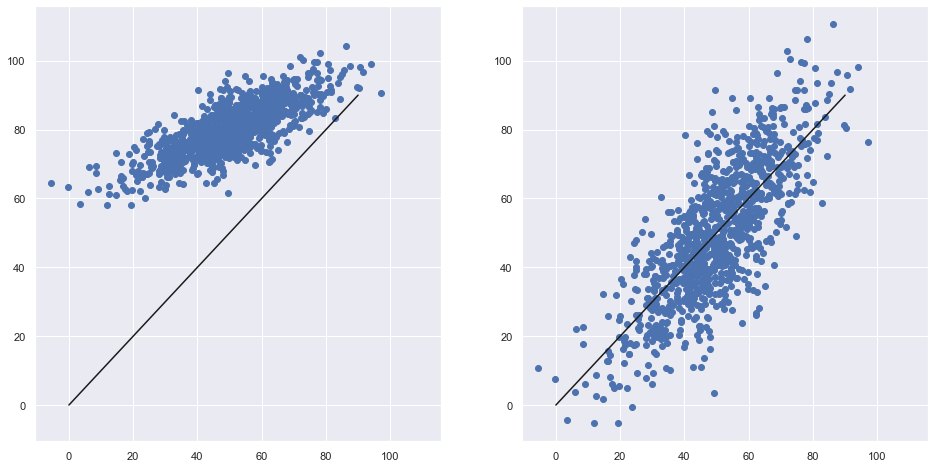

30.150141033972446
9.908614915802605
======= b = 600.0 =======


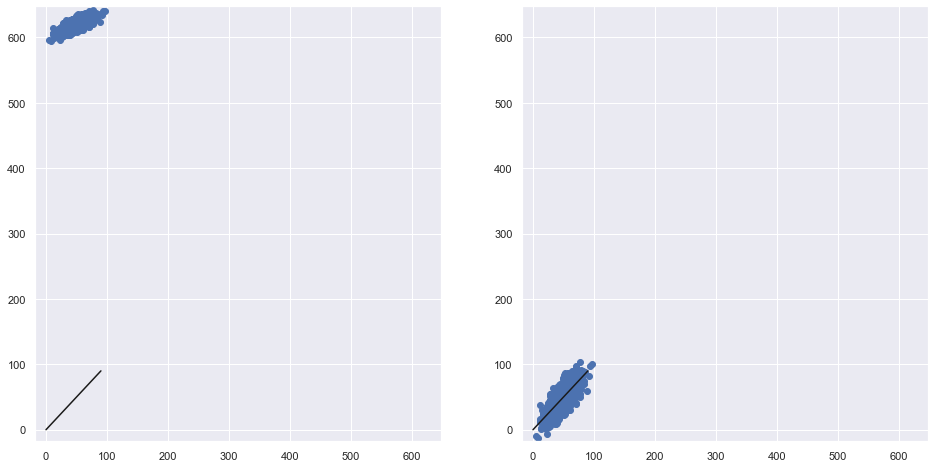

570.8301103571355
9.527172330126536


In [81]:
B = [0.1, 10, 25, 50, 75, 100, 1000]
a = 0.4
for b in B:
    b=b*(1-a)
    print("======= b = {} =======".format(b))
    func(b=b)

======= e = 0.1 =======


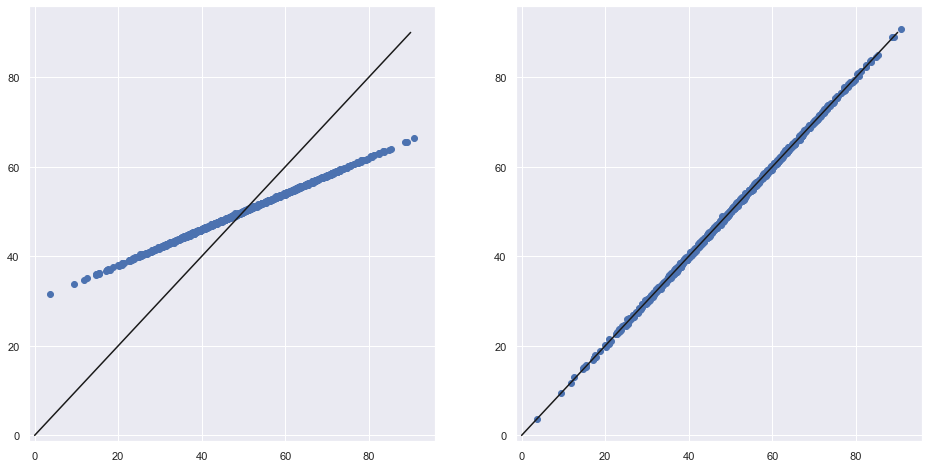

7.092658005215278
0.20087167987213453
======= e = 5 =======


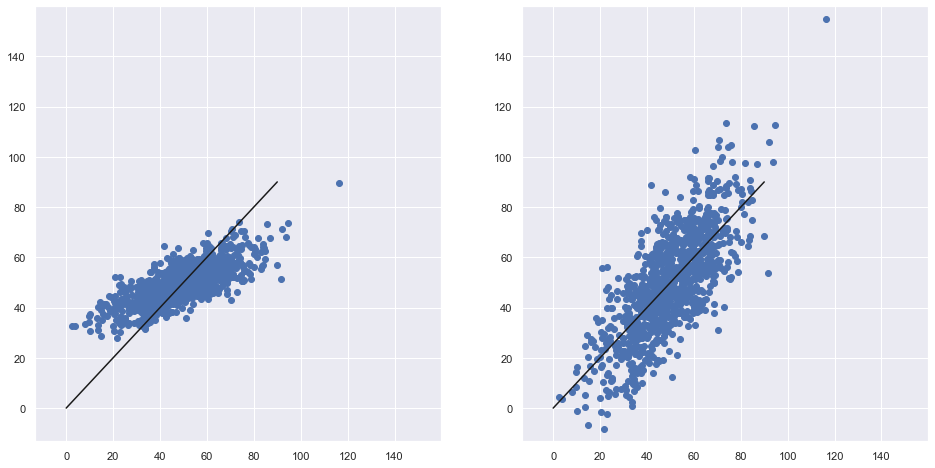

8.472903653189396
10.857409636049683
======= e = 10 =======


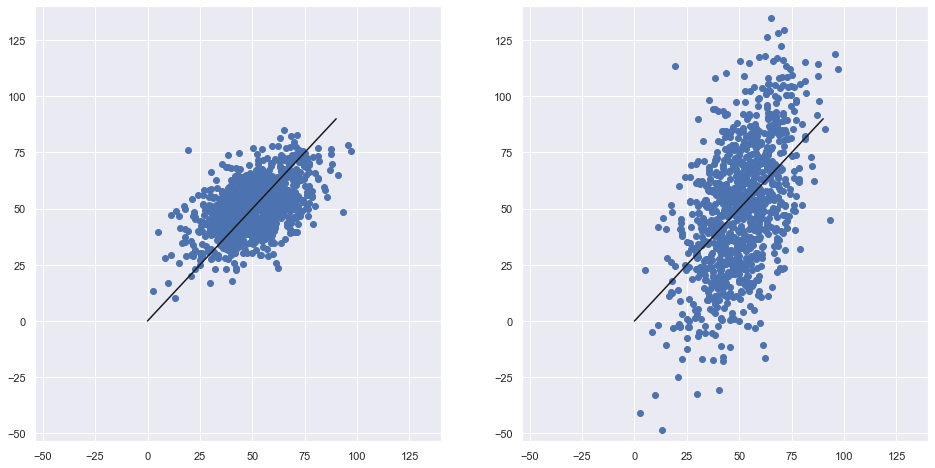

10.492402457956178
19.942186396986354
======= e = 50 =======


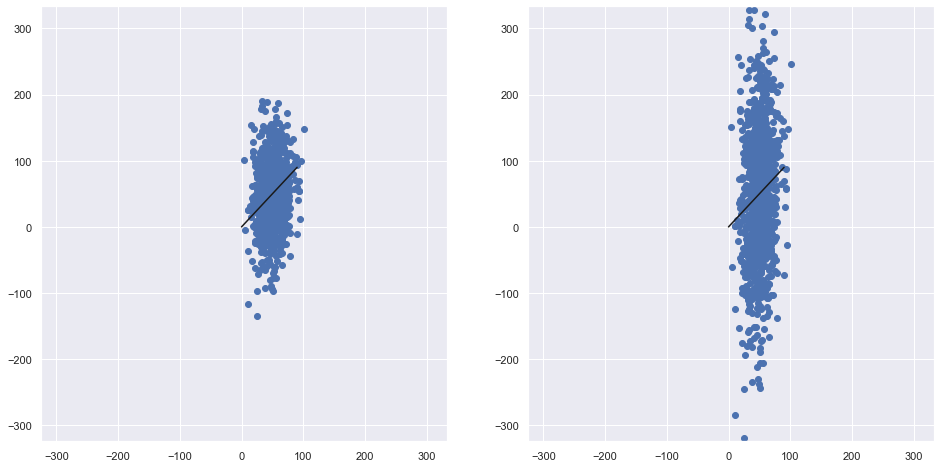

39.82899059014663
78.80682932162978
======= e = 100 =======


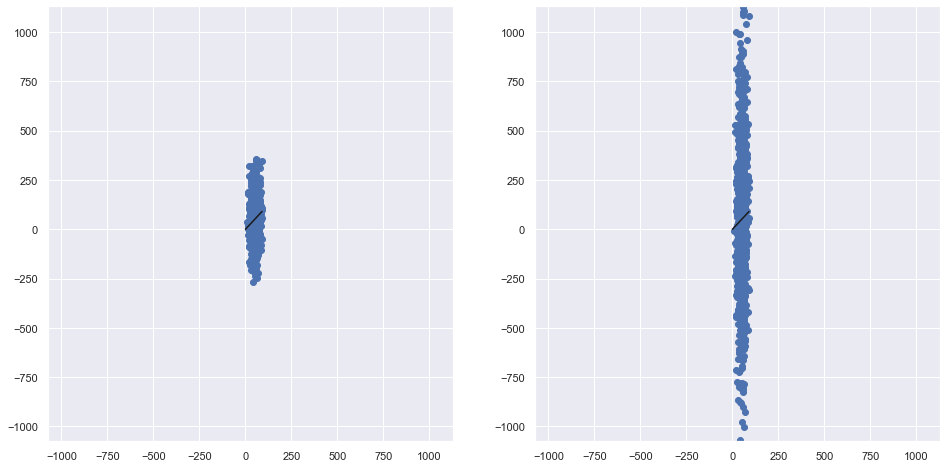

82.90632818312582
291.00538529424267


In [82]:
E = [0.1, 5, 10, 50, 100]
for e in E:
    print("======= e = {} =======".format(e))
    func(e=e)